In [1]:
import torch as t 
import torchvision
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pylab as plt
from torch.nn.utils import clip_grad_value_
%matplotlib inline
import pickle
from torchvision import datasets, transforms
import tqdm
import os
import sys
sys.path.append('../src/')

In [9]:
import importlib 
import var_net
import base_net 
import mnist_utils as utils
importlib.reload(utils)
importlib.reload(base_net)
importlib.reload(var_net)



<module 'var_net' from '../src/var_net.py'>

In [3]:
device = 'cuda' # cuda or cpu
device = t.device(device)
if device == 'cuda':
    t.backends.cudnn.deterministic = True
    t.backends.cudnn.benchmark = False

In [4]:
batch_size = 256
init_log_sigma = -3.0 # логарифм дисперсии вариационного распределения при инициализации
prior_sigma = .1 # априорная дисперсия
epoch_num = 25 #количество эпох
lamb = [0.01, 0.1, 1.0,  10.0, 100.0]
lamb = [t.tensor(l) for l in lamb]
hidden_num = 50 # количество нейронов на скрытом слое
acc_delete = [] 
start_num = 5
path_to_save = 'saved_mnist'
lambda_sample_num = 5
lambda_encode = t.log 

if not os.path.exists(path_to_save):
    os.mkdir(path_to_save)

In [5]:
# загрузка данных
train_data = torchvision.datasets.MNIST('./files/', train=True, download=True,
                             transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                                  torchvision.transforms.Lambda(lambda x: x.view(-1))
                              ]))

test_data = torchvision.datasets.MNIST('./files/', train=False, download=True,
                             transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                                  torchvision.transforms.Lambda(lambda x: x.view(-1))
                              ]))


train_loader = t.utils.data.DataLoader(train_data, batch_size=batch_size, pin_memory=True )
test_loader = t.utils.data.DataLoader(test_data, batch_size=batch_size)





In [ ]:
t.manual_seed(0)

for start in range(start_num):                    
        net = var_net.VarNet(base_net.BaseLayerLinear(784,  hidden_num, prior_sigma=prior_sigma),
                     base_net.BaseLayerLinear(hidden_num, 10, act=lambda x:x, prior_sigma=prior_sigma))

        net = net.to(device)
        optim = t.optim.Adam(net.parameters(), lr=5e-4)
        loss_fn = nn.CrossEntropyLoss().to(device)            
        for e in range(epoch_num):
            label = 'epoch {}: '.format(e)                
            utils.train_batches_hypernet(train_loader,  len(train_data), lambda_sample_num,
                  lambda_encode, net, device, loss_fn, optim, label, rep=False)
            if e%5 == 0:
                print (utils.test_acc_hyper(net, device, test_loader, lambda_encode, lamb))
        t.save(net.state_dict(), os.path.join(path_to_save, 'base_linear_start_{}.cpk'.format(start)))

epoch 1: 1.0475303:   1%|          | 2/235 [00:00<00:14, 15.55it/s] 

{tensor(0.0100): 0.8054, tensor(0.1000): 0.8112, tensor(1.): 0.6669, tensor(10.): 0.8638, tensor(100.): 0.8489}


epoch 6: 0.32391593:   1%|          | 2/235 [00:00<00:14, 16.09it/s]

{tensor(0.0100): 0.9117, tensor(0.1000): 0.9296, tensor(1.): 0.907, tensor(10.): 0.9056, tensor(100.): 0.8912}


epoch 11: 0.22301225:   1%|          | 2/235 [00:00<00:15, 15.16it/s]

{tensor(0.0100): 0.9342, tensor(0.1000): 0.9432, tensor(1.): 0.9292, tensor(10.): 0.9138, tensor(100.): 0.8732}


epoch 16: 0.23989439:   1%|          | 2/235 [00:00<00:13, 16.94it/s]

{tensor(0.0100): 0.9519, tensor(0.1000): 0.9548, tensor(1.): 0.945, tensor(10.): 0.9289, tensor(100.): 0.9137}


epoch 21: 0.1527872:   1%|          | 2/235 [00:00<00:13, 17.67it/s] 

{tensor(0.0100): 0.9488, tensor(0.1000): 0.9553, tensor(1.): 0.9523, tensor(10.): 0.9364, tensor(100.): 0.9084}


epoch 1: 1.3286631:   1%|          | 2/235 [00:00<00:16, 14.05it/s]

{tensor(0.0100): 0.8077, tensor(0.1000): 0.8287, tensor(1.): 0.7038, tensor(10.): 0.8229, tensor(100.): 0.8082}


epoch 6: 2.1058025:   1%|          | 2/235 [00:00<00:18, 12.75it/s]

{tensor(0.0100): 0.9142, tensor(0.1000): 0.9221, tensor(1.): 0.9018, tensor(10.): 0.9127, tensor(100.): 0.908}


epoch 11: 0.8429452:   0%|          | 1/235 [00:00<00:23,  9.99it/s] 

{tensor(0.0100): 0.9409, tensor(0.1000): 0.9427, tensor(1.): 0.9301, tensor(10.): 0.918, tensor(100.): 0.9019}


epoch 16: 0.18098053:   0%|          | 1/235 [00:00<00:27,  8.51it/s]

{tensor(0.0100): 0.9323, tensor(0.1000): 0.9487, tensor(1.): 0.9399, tensor(10.): 0.8814, tensor(100.): 0.7504}


epoch 21: 0.120209545:   1%|          | 2/235 [00:00<00:13, 16.73it/s]

{tensor(0.0100): 0.9475, tensor(0.1000): 0.9534, tensor(1.): 0.953, tensor(10.): 0.9311, tensor(100.): 0.9009}


epoch 1: 2.4357867:   1%|          | 2/235 [00:00<00:16, 14.40it/s]

{tensor(0.0100): 0.7793, tensor(0.1000): 0.8261, tensor(1.): 0.7249, tensor(10.): 0.858, tensor(100.): 0.8575}


epoch 6: 0.617473:   1%|          | 2/235 [00:00<00:17, 13.33it/s]

{tensor(0.0100): 0.9238, tensor(0.1000): 0.9278, tensor(1.): 0.9111, tensor(10.): 0.9138, tensor(100.): 0.9075}


epoch 11: 0.58915174:   1%|          | 2/235 [00:00<00:18, 12.89it/s]

{tensor(0.0100): 0.9418, tensor(0.1000): 0.9464, tensor(1.): 0.9363, tensor(10.): 0.9127, tensor(100.): 0.8907}


epoch 12: 0.3849907:  71%|███████   | 167/235 [00:13<00:05, 11.42it/s] 

In [11]:
net = var_net.VarNet(base_net.BaseLayer(784,  hidden_num, device),
                     base_net.BaseLayer(hidden_num, 10, device, act=lambda x:x)).to(device)

hnet = var_net.VarNet(base_net.BaseLayerLinear(784,  hidden_num),
                     base_net.BaseLayerLinear(hidden_num, 10, act=lambda x:x))
hnet = hnet.to(device)
net = net.to(device)
lam_results = {}
for lam in lamb:
    lam_results[lam] = []
    for s in range(start_num):        
        print (lam, s)
        hnet.load_state_dict(t.load(os.path.join(path_to_save, 'base_linear_start_{}.cpk'.format(s))))        
        utils.net_copy(hnet, net, lambda_encode(t.ones(1).to(device)[0]*lam), mode='base')
        lam_results[lam].append(utils.delete_10(net, device, lambda:utils.test_acc_net(net, device, test_loader), mode='base'))
lam_results = {float(k):lam_results[k] for k in lam_results}
import json
with open(os.path.join(path_to_save, 'results_base_linear.json'),'w') as out:
    out.write(json.dumps(lam_results))  

../src/base_net.py:11: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  t.nn.init.xavier_uniform(self.mean)


tensor(0.0100) 0
tensor(0.0100) 1
tensor(0.0100) 2
tensor(0.0100) 3
tensor(0.0100) 4
tensor(0.1000) 0
tensor(0.1000) 1
tensor(0.1000) 2
tensor(0.1000) 3
tensor(0.1000) 4
tensor(1.) 0
tensor(1.) 1
tensor(1.) 2
tensor(1.) 3
tensor(1.) 4
tensor(10.) 0
tensor(10.) 1
tensor(10.) 2
tensor(10.) 3
tensor(10.) 4
tensor(100.) 0
tensor(100.) 1
tensor(100.) 2
tensor(100.) 3
tensor(100.) 4


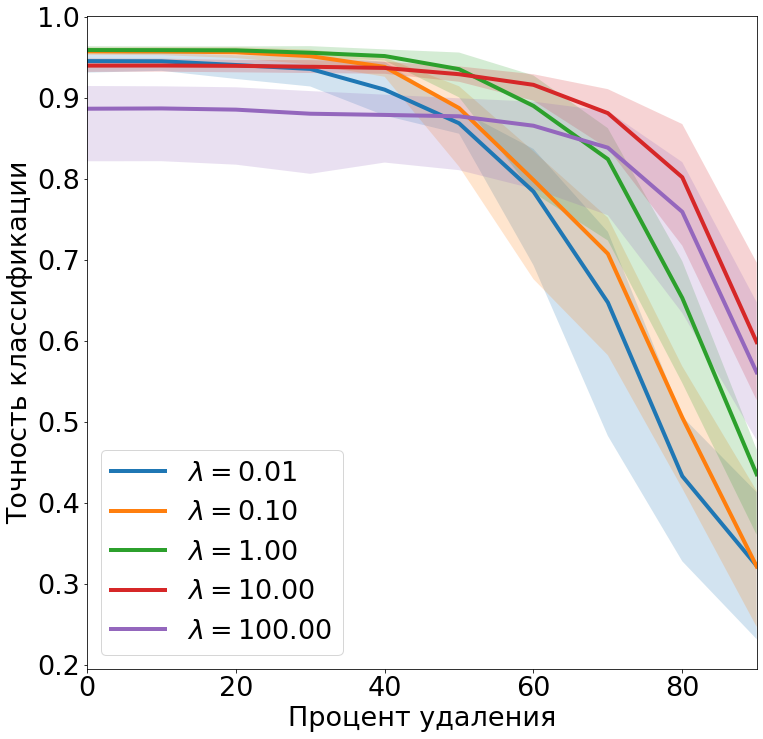

In [12]:
proc = [0,10,20,30,40,50,60,70,80,90]
plt.rcParams['figure.figsize'] = 12, 12
plt.rcParams.update({'font.size': 27})
plt.rc('lines', linewidth=4)
    
    
for lam in lamb:
    lam = float(lam)
    lam_str = "{:10.2f}".format(lam)

    plt.fill_between(proc, np.min(lam_results[lam], 0), np.max(lam_results[lam], 0), alpha=0.2)
    plt.plot(proc, np.mean(lam_results[lam], 0), label='$\lambda={}$'.format(lam_str))
plt.ylabel('Точность классификации', fontsize = 27)
plt.xlabel('Процент удаления', fontsize = 27)
plt.tick_params(axis='both', which='major', labelsize=27)
plt.legend(loc='lower left')
plt.autoscale(enable=True, axis='x', tight=True)
plt.savefig('Linear_base')
#plt.show()
